# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [ ]:
plt.rc('font', size=15)

# Importing the Input Datasets

In [ ]:
Inpatient_Data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')

In [ ]:
Outpatient_Data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [ ]:
Inpatient_Summary_DRG = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')

In [ ]:
Outpatient_Summary_APC = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')

# Data Inspection

In [ ]:
Inpatient_Data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [ ]:
Inpatient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [ ]:
Inpatient_Data.shape

(163065, 12)

In [ ]:
Inpatient_Data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.87,151563.67,10001.00,110092.00,250007.00,380075.00,670077.00
Provider Zip Code,163065.0,47938.12,27854.32,1040.00,27261.00,44309.00,72901.00,99835.00
Total Discharges,163065.0,42.78,51.10,11.00,17.00,27.00,49.00,3383.00
Average Covered Charges,163065.0,36133.96,35065.37,2459.40,15947.17,25245.82,43232.59,929118.91
Average Total Payments,163065.0,9707.48,7664.64,2673.00,5234.50,7214.10,11286.40,156158.18
Average Medicare Payments,163065.0,8494.50,7309.47,1148.91,4192.35,6158.47,10056.88,154620.82


In [ ]:
Outpatient_Data.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [ ]:
Outpatient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [ ]:
Outpatient_Data.shape

(43372, 11)

In [ ]:
Outpatient_Data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.92,152729.93,10001.00,140043.00,260091.0,390101.00,670061.00
Provider Zip Code,43372.0,49041.02,27497.90,1040.00,28645.00,46342.0,73101.00,99801.00
Outpatient Services,43372.0,587.98,3280.40,11.00,42.00,128.0,347.00,219042.00
Average Estimated Submitted Charges,43372.0,1473.99,1837.53,12.64,284.61,710.0,2102.12,32105.64
Average Total Payments,43372.0,265.43,261.26,7.30,74.63,139.3,394.21,2062.47


In [ ]:
Inpatient_Data.isna().sum()

DRG Definition                                0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Total Discharges                              0
Average Covered Charges                       0
Average Total Payments                        0
Average Medicare Payments                     0
dtype: int64

In [ ]:
Outpatient_Data.isna().sum()

APC                                           0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Outpatient Services                           0
Average  Estimated Submitted Charges          0
Average Total Payments                        0
dtype: int64

In [ ]:
print('There are',len(Inpatient_Data['DRG Definition'].value_counts()),'DRGs covered in this Inpatient Data for',len(Inpatient_Data['Provider Id'].value_counts()),'Providers.')
print('There are',len(Outpatient_Data['APC'].value_counts()),'APC Classes covered in this Outpatient Data for',len(Outpatient_Data['Provider Id'].value_counts()),'Providers.')

There are 100 DRGs covered in this Inpatient Data for 3337 Providers.
There are 30 APC Classes covered in this Outpatient Data for 3135 Providers.


# Data Manipulation

In [ ]:
Inpatient1 = Inpatient_Data.copy()
Outpatient1 = Outpatient_Data.copy()

### Type Conversion

In [ ]:
Inpatient1['Provider Id'] = Inpatient1['Provider Id'].astype('object')
Inpatient1['Provider Zip Code'] = Inpatient1['Provider Zip Code'].astype('object')

In [ ]:
Outpatient1['Provider Id'] = Outpatient1['Provider Id'].astype('object')
Outpatient1['Provider Zip Code'] = Outpatient1['Provider Zip Code'].astype('object')

# Exploratory Data Analysis

## Part 1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

### A. Highest Cost Variation.

#### For Inpatient Data

In [ ]:
Inpatient_summ1 = Inpatient1.groupby('DRG Definition')['Average Covered Charges'].agg(['std','mean']).reset_index()

In [ ]:
Inpatient_summ1['CV'] = Inpatient_summ1['std']/Inpatient_summ1['mean']

In [ ]:
Inpatient_summ1.sort_values(by='CV', ascending=False, ignore_index=True, inplace=True)
Inpatient_summ1.head()

,DRG Definition,std,mean,CV
0,885 - PSYCHOSES,14305.274994,19929.455817,0.717796
1,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,11150.914646,17589.098728,0.633967
2,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,24737.866985,40345.535785,0.613150
3,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,17786.867925,29140.948455,0.610374
4,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,20912.138121,34276.195530,0.610107


In [ ]:
Inpatient1[Inpatient1['DRG Definition']=='885 - PSYCHOSES'][['DRG Definition', 'Provider Name', 'Average Covered Charges']].sort_values(by='Average Covered Charges', ascending=False).head(3)

,DRG Definition,Provider Name,Average Covered Charges
157581,885 - PSYCHOSES,LAC+USC MEDICAL CENTER,144522.66670
157921,885 - PSYCHOSES,ENGLEWOOD HOSPITAL AND MEDICAL CENTER,127807.48150
157926,885 - PSYCHOSES,SAINT BARNABAS MEDICAL CENTER,98584.92857


In [ ]:
Inpatient1[Inpatient1['DRG Definition']=='897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC'][['DRG Definition', 'Provider Name', 'Average Covered Charges']].sort_values(by='Average Covered Charges', ascending=False).head(1)

,DRG Definition,Provider Name,Average Covered Charges
158907,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,HAHNEMANN UNIVERSITY HOSPITAL,79932.53846


In [ ]:
Inpatient1[Inpatient1['DRG Definition']=='917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC'][['DRG Definition', 'Provider Name', 'Average Covered Charges']].sort_values(by='Average Covered Charges', ascending=False).head(2)

,DRG Definition,Provider Name,Average Covered Charges
159137,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,NORTHBAY MEDICAL CENTER,236455.9091
159143,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,DOCTORS MEDICAL CENTER,187714.9583


In [ ]:
Top3DRG = list(Inpatient_summ1['DRG Definition'][:3,])

In [ ]:
Inpatient_summ2 = Inpatient1[Inpatient1['DRG Definition'].apply(lambda x: x in Top3DRG)]

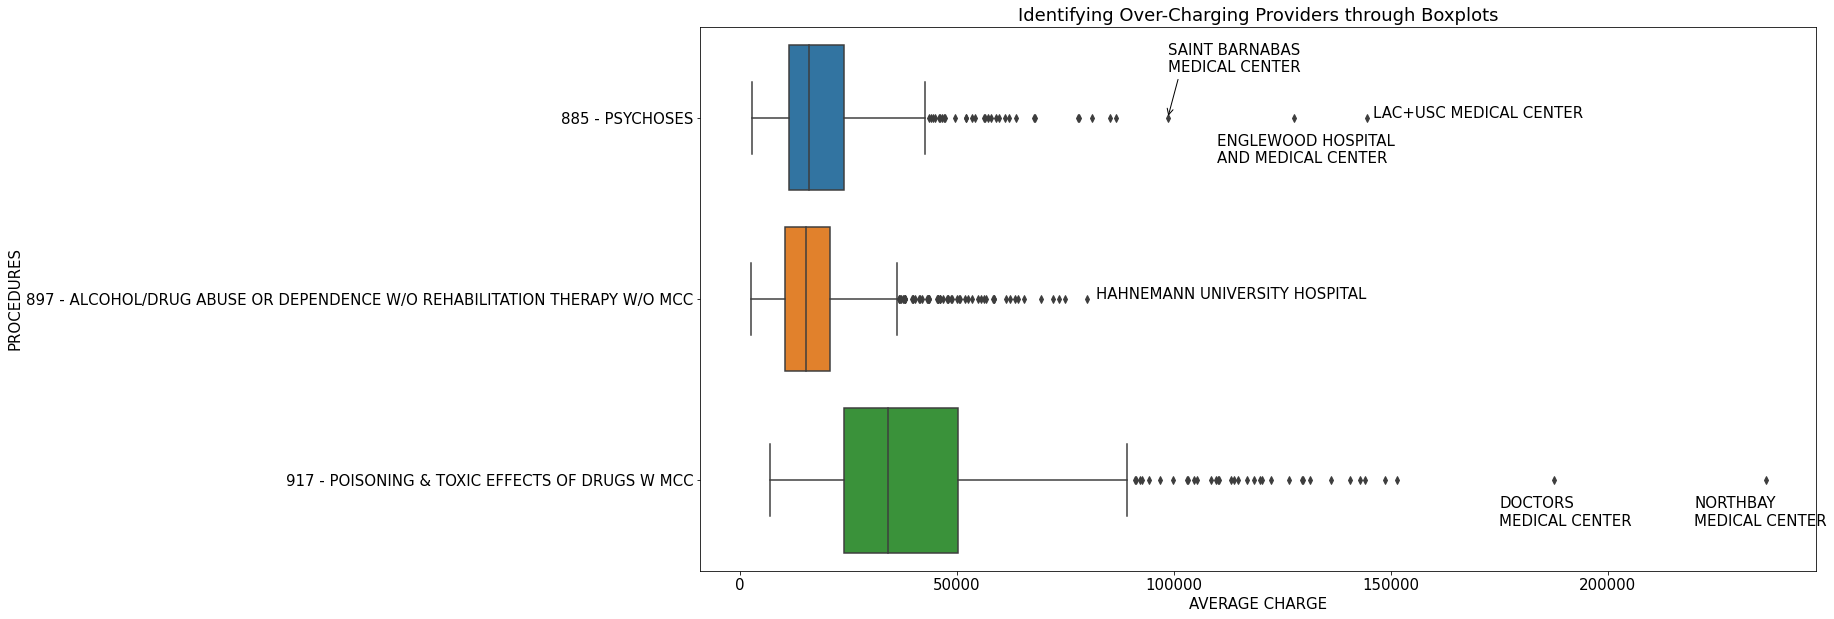

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Inpatient_summ2, y='DRG Definition', x='Average Covered Charges')
plt.xlabel('AVERAGE CHARGE')
plt.ylabel('PROCEDURES')
plt.title('Identifying Over-Charging Providers through Boxplots')
plt.annotate('LAC+USC MEDICAL CENTER', xy =(144522, 0), xytext =(146000, 0))
plt.annotate('ENGLEWOOD HOSPITAL\nAND MEDICAL CENTER', xy =(127807, 0), xytext =(110000, 0.25))
plt.annotate('SAINT BARNABAS\nMEDICAL CENTER', xy =(98584, 0), xytext =(98584, -0.25), arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 75"))
plt.annotate('HAHNEMANN UNIVERSITY HOSPITAL', xy =(79932, 1), xytext =(82000, 1))
plt.annotate('NORTHBAY\nMEDICAL CENTER', xy =(236455, 2), xytext =(220000, 2.25))
plt.annotate('DOCTORS\nMEDICAL CENTER', xy =(187714, 2), xytext =(175000, 2.25))
plt.show()

#### For Outpatient Data

In [ ]:
Outpatient_summ1 = Outpatient1.groupby('APC')['Average  Estimated Submitted Charges'].agg(['std','mean']).reset_index()

In [ ]:
Outpatient_summ1['CV'] = Outpatient_summ1['std']/Outpatient_summ1['mean']

In [ ]:
Outpatient_summ1.sort_values(by='CV', ascending=False, ignore_index=True, inplace=True)
Outpatient_summ1.head()

,APC,std,mean,CV
0,0604 - Level 1 Hospital Clinic Visits,235.176544,169.784228,1.385150
1,0698 - Level II Eye Tests & Treatments,328.498347,250.677099,1.310444
2,0019 - Level I Excision/ Biopsy,2785.011224,2264.425957,1.229897
3,0692 - Level II Electronic Analysis of Devices,795.774420,705.369695,1.128166
4,0012 - Level I Debridement & Destruction,95.646537,91.084383,1.050087


In [ ]:
Outpatient1[Outpatient1.APC=='0604 - Level 1 Hospital Clinic Visits'][['APC', 'Provider Name', 'Average  Estimated Submitted Charges']].sort_values(by='Average  Estimated Submitted Charges', ascending=False).head(1)

,APC,Provider Name,Average Estimated Submitted Charges
35467,0604 - Level 1 Hospital Clinic Visits,LOWER BUCKS HOSPITAL,9780.157143


In [ ]:
Outpatient1[Outpatient1.APC=='0698 - Level II Eye Tests & Treatments'][['APC', 'Provider Name', 'Average  Estimated Submitted Charges']].sort_values(by='Average  Estimated Submitted Charges', ascending=False).head(1)

,APC,Provider Name,Average Estimated Submitted Charges
43197,0698 - Level II Eye Tests & Treatments,RONALD REAGAN UCLA MEDICAL CENTER,4187.255


In [ ]:
Outpatient1[Outpatient1.APC=='0019 - Level I Excision/ Biopsy'][['APC', 'Provider Name', 'Average  Estimated Submitted Charges']].sort_values(by='Average  Estimated Submitted Charges', ascending=False).head(3)

,APC,Provider Name,Average Estimated Submitted Charges
3336,0019 - Level I Excision/ Biopsy,CENTINELA HOSPITAL MEDICAL CENTER,26466.64500
3335,0019 - Level I Excision/ Biopsy,WHITTIER HOSPITAL MEDICAL CENTER,20298.21429
3521,0019 - Level I Excision/ Biopsy,NATCHEZ COMMUNITY HOSPITAL/SWING BED,16416.69714


In [ ]:
Top3APC = list(Outpatient_summ1.APC[:3,])

In [ ]:
Outpatient_summ2 = Outpatient1[Outpatient1.APC.apply(lambda x: x in Top3APC)]

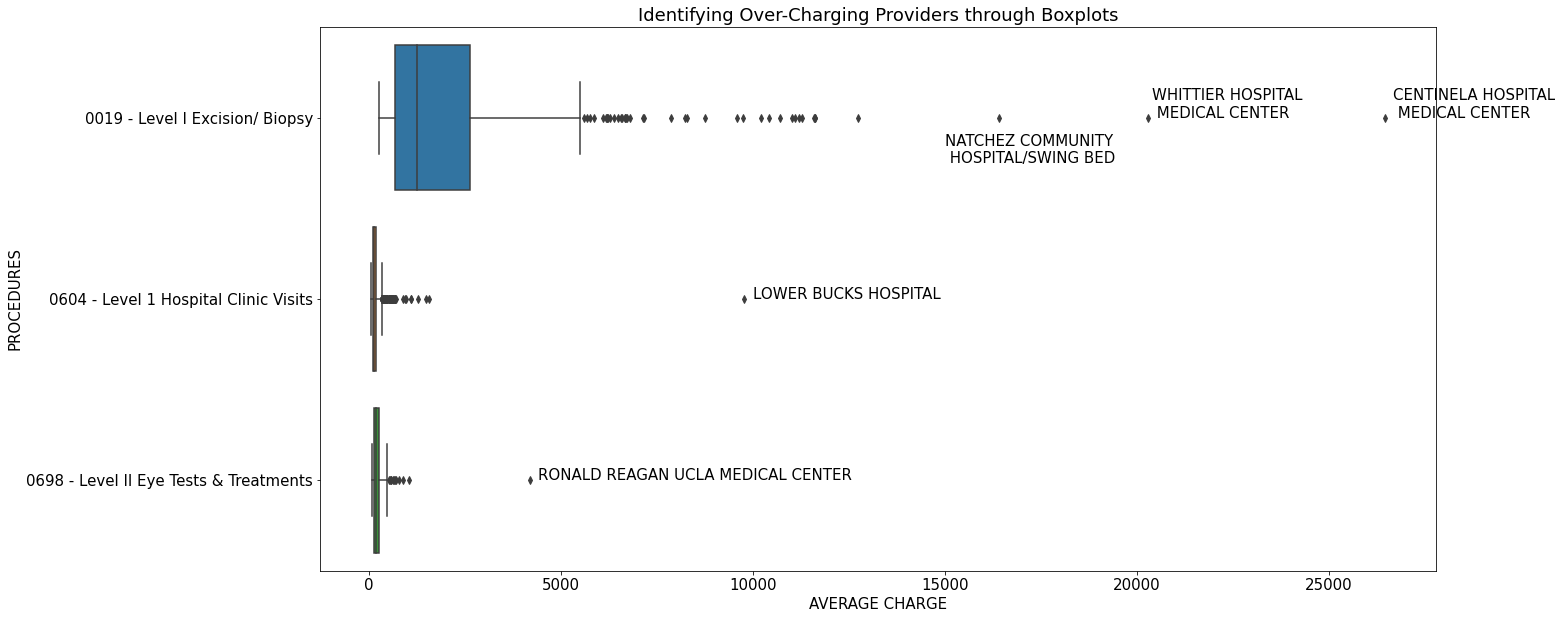

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Outpatient_summ2, y='APC', x='Average  Estimated Submitted Charges')
plt.xlabel('AVERAGE CHARGE')
plt.ylabel('PROCEDURES')
plt.title('Identifying Over-Charging Providers through Boxplots')
plt.annotate('LOWER BUCKS HOSPITAL', xy =(9780, 1), xytext =(10000, 1))
plt.annotate('CENTINELA HOSPITAL \n MEDICAL CENTER', xy =(26466, 0), xytext =(26666, 0))
plt.annotate('WHITTIER HOSPITAL \n MEDICAL CENTER', xy =(20298, 0), xytext =(20400, 0))
plt.annotate('NATCHEZ COMMUNITY \n HOSPITAL/SWING BED', xy =(16416, 0), xytext =(15000, 0.25))
plt.annotate('RONALD REAGAN UCLA MEDICAL CENTER', xy =(4187, 2), xytext =(4400, 2))
plt.show()

### B. Highest Cost Claims by Providers.



#### For Inpatient Data

In [ ]:
Inpatient_summ3 = Inpatient1.groupby('DRG Definition')[['Average Covered Charges']].max().add_suffix(' Max').reset_index()

In [ ]:
Inpatient_MaxP = Inpatient1.merge(Inpatient_summ3, on='DRG Definition', how='left')

In [ ]:
temp_list = []
for x,y in zip(Inpatient_MaxP['Average Covered Charges'], Inpatient_MaxP['Average Covered Charges Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Inpatient_MaxP['Max'] = temp_list

In [ ]:
Inpatient_summ3 = Inpatient_MaxP.groupby('Provider Name')[['Max']].sum().sort_values(by='Max', ascending=False).reset_index()
Inpatient_summ3 = Inpatient_summ3[Inpatient_summ3.Max > 0]

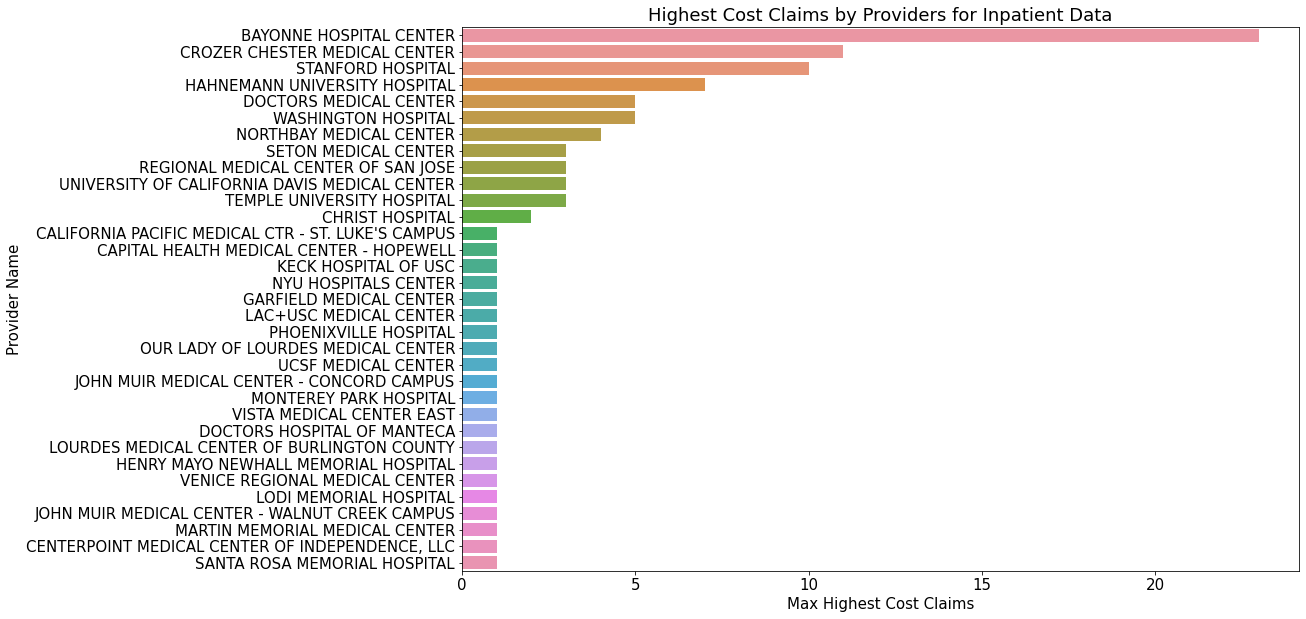

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Inpatient_summ3, x='Max', y='Provider Name', orient='h')
plt.xlabel('Max Highest Cost Claims')
plt.title('Highest Cost Claims by Providers for Inpatient Data')
plt.show()

In [ ]:
# Top 4 Providers with Most Highest Cost Claims for Inpatient Data
Inpatient_summ3[0:4]

,Provider Name,Max
0,BAYONNE HOSPITAL CENTER,23
1,CROZER CHESTER MEDICAL CENTER,11
2,STANFORD HOSPITAL,10
3,HAHNEMANN UNIVERSITY HOSPITAL,7


#### For Outpatient Data

In [ ]:
Outpatient_summ3 = Outpatient1.groupby('APC')[['Average  Estimated Submitted Charges']].max().add_suffix(' Max').reset_index()

In [ ]:
Outpatient_MaxP = Outpatient1.merge(Outpatient_summ3, on='APC', how='left')

In [ ]:
temp_list = []
for x,y in zip(Outpatient_MaxP['Average  Estimated Submitted Charges'], Outpatient_MaxP['Average  Estimated Submitted Charges Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Outpatient_MaxP['Max'] = temp_list

In [ ]:
Outpatient_summ3 = Outpatient_MaxP.groupby('Provider Name')[['Max']].sum().sort_values(by='Max', ascending=False).reset_index()
Outpatient_summ3 = Outpatient_summ3[Outpatient_summ3.Max > 0]

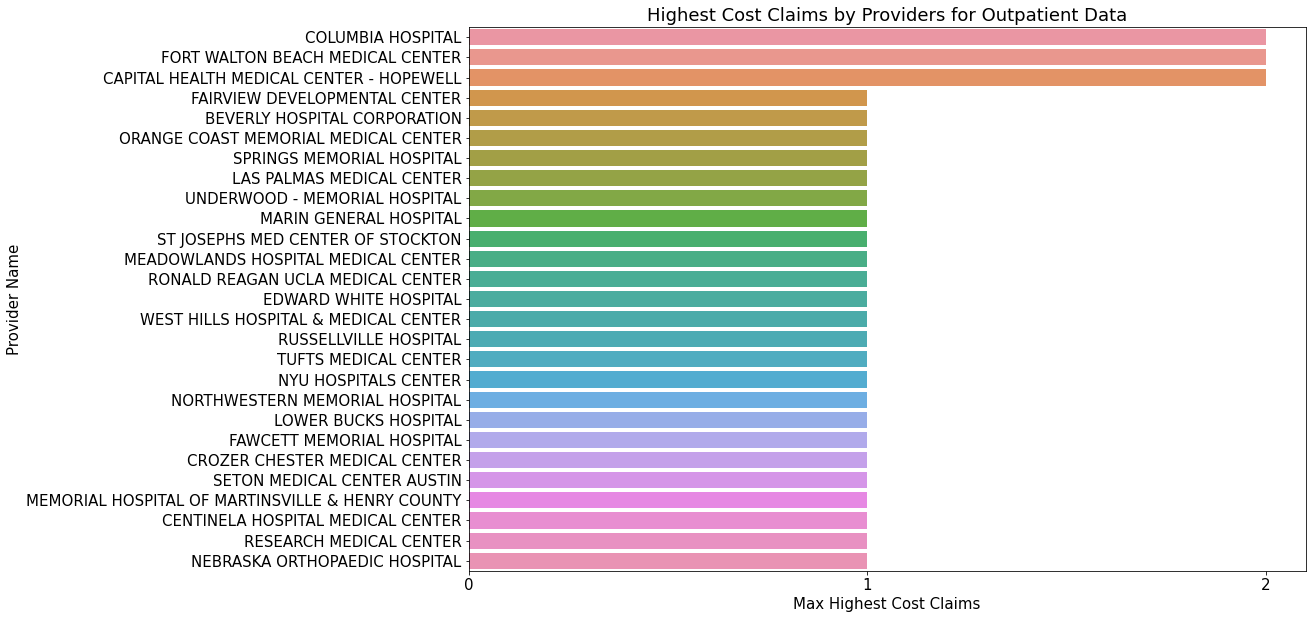

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Outpatient_summ3, x='Max', y='Provider Name', orient='h')
plt.xlabel('Max Highest Cost Claims')
plt.title('Highest Cost Claims by Providers for Outpatient Data')
plt.xticks([0,1,2])
plt.show()

In [ ]:
# Top 3 Providers with Most Highest Cost Claims for Outpatient Data
Outpatient_summ3.head(3)

,Provider Name,Max
0,COLUMBIA HOSPITAL,2
1,FORT WALTON BEACH MEDICAL CENTER,2
2,CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,2


### C. Highest Cost Claims by Regions.

#### For Inpatient Data

In [ ]:
Inpatient_Reg_Avg = Inpatient1.groupby(['DRG Definition','Hospital Referral Region (HRR) Description'])[['Average Covered Charges']].mean().add_suffix(' Avg').reset_index()

In [ ]:
Inpatient_Reg_Avg_Max = Inpatient_Reg_Avg.groupby('DRG Definition')[['Average Covered Charges Avg']].max().add_suffix(' Max').reset_index()

In [ ]:
Inpatient_MaxR = Inpatient_Reg_Avg.merge(Inpatient_Reg_Avg_Max, on ='DRG Definition', how='left')

In [ ]:
temp_list = []
for x,y in zip(Inpatient_MaxR['Average Covered Charges Avg'], Inpatient_MaxR['Average Covered Charges Avg Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Inpatient_MaxR['Max'] = temp_list

In [ ]:
Inpatient_summ4 = Inpatient_MaxR.groupby('Hospital Referral Region (HRR) Description')[['Max']].sum().sort_values(by='Max', ascending=False).reset_index()
Inpatient_summ4 = Inpatient_summ4[Inpatient_summ4.Max > 0]

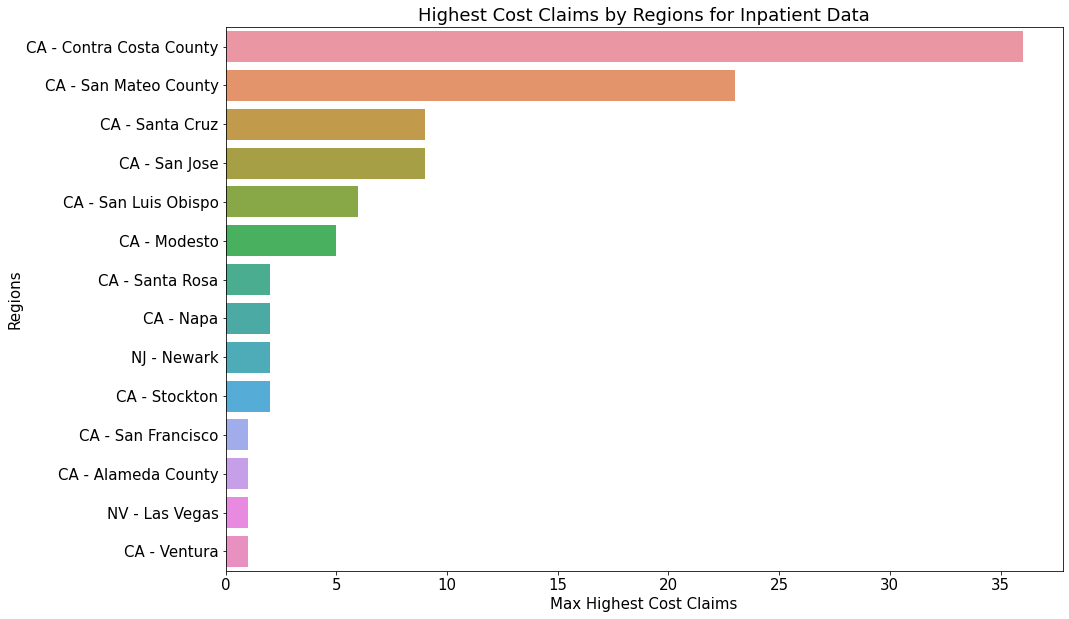

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Inpatient_summ4, x='Max', y='Hospital Referral Region (HRR) Description', orient='h')
plt.xlabel('Max Highest Cost Claims')
plt.ylabel('Regions')
plt.title('Highest Cost Claims by Regions for Inpatient Data')
plt.show()

In [ ]:
# Top 5 Regions with Most Highest Cost Claims for Intpatient Data
Inpatient_summ4.head(5)

,Hospital Referral Region (HRR) Description,Max
0,CA - Contra Costa County,36
1,CA - San Mateo County,23
2,CA - Santa Cruz,9
3,CA - San Jose,9
4,CA - San Luis Obispo,6


#### For Outpatient Data

In [ ]:
Outpatient_Reg_Avg = Outpatient1.groupby(['APC','Hospital Referral Region (HRR) Description'])[['Average  Estimated Submitted Charges']].mean().add_suffix(' Avg').reset_index()

In [ ]:
Outpatient_Reg_Avg_Max = Outpatient_Reg_Avg.groupby('APC')[['Average  Estimated Submitted Charges Avg']].max().add_suffix(' Max').reset_index()

In [ ]:
Outpatient_MaxR = Outpatient_Reg_Avg.merge(Outpatient_Reg_Avg_Max, on ='APC', how='left')

In [ ]:
temp_list = []
for x,y in zip(Outpatient_MaxR['Average  Estimated Submitted Charges Avg'], Outpatient_MaxR['Average  Estimated Submitted Charges Avg Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Outpatient_MaxR['Max'] = temp_list

In [ ]:
Outpatient_summ4 = Outpatient_MaxR.groupby('Hospital Referral Region (HRR) Description')[['Max']].sum().sort_values(by='Max', ascending=False).reset_index()
Outpatient_summ4 = Outpatient_summ4[Outpatient_summ4.Max > 0]

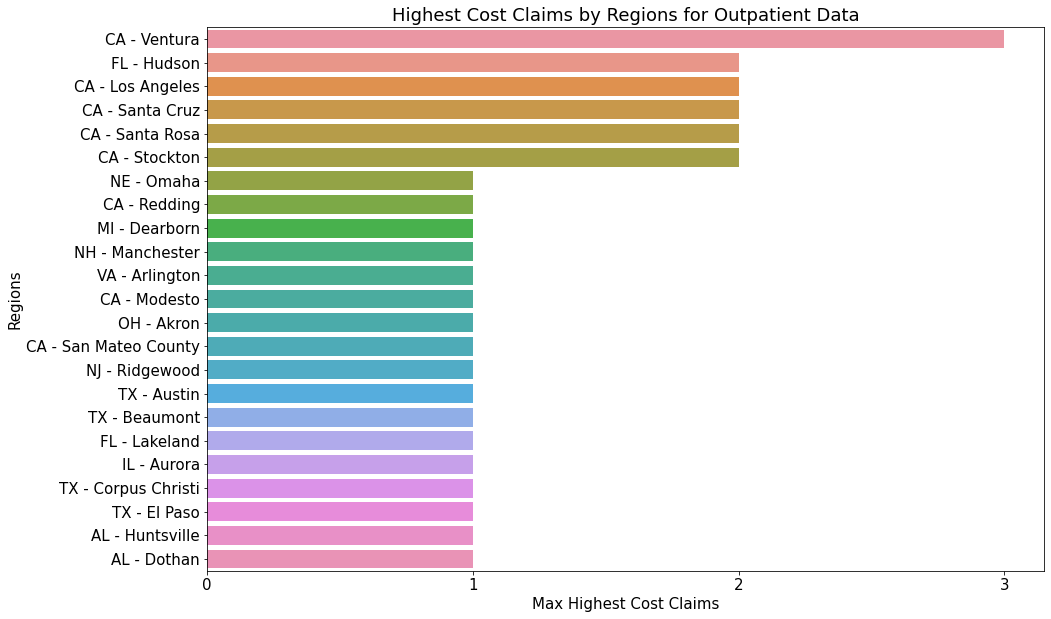

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Outpatient_summ4, x='Max', y='Hospital Referral Region (HRR) Description', orient='h')
plt.xticks([0,1,2,3])
plt.xlabel('Max Highest Cost Claims')
plt.ylabel('Regions')
plt.title('Highest Cost Claims by Regions for Outpatient Data')
plt.show()

In [ ]:
# Top 6 Regions with Most Highest Cost Claims for Outpatient Data
Outpatient_summ4.head(6)

,Hospital Referral Region (HRR) Description,Max
0,CA - Ventura,3
1,FL - Hudson,2
2,CA - Los Angeles,2
3,CA - Santa Cruz,2
4,CA - Santa Rosa,2
5,CA - Stockton,2


### D. Highest Number of Procedures and Largest Differences Between Claims and Reimbursements.

#### For Inpatient Data

In [ ]:
Inpatient1['Claim_Diff'] = Inpatient1['Average Covered Charges'] - Inpatient1['Average Total Payments']

In [ ]:
Inpatient_Claim_Diff_Max = Inpatient1.groupby('DRG Definition')[['Claim_Diff']].max().add_suffix('_Max').reset_index()

In [ ]:
Inpatient_summ5 = Inpatient1.merge(Inpatient_Claim_Diff_Max, on='DRG Definition', how='left')

In [ ]:
temp_list = []
for x,y in zip(Inpatient_summ5['Claim_Diff'], Inpatient_summ5['Claim_Diff_Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Inpatient_summ5['Max'] = temp_list

In [ ]:
Inpatient_summ6 = Inpatient_summ5.groupby('Provider Name')[['Max']].sum().add_suffix('_Sum').sort_values(by='Max_Sum', ascending=False).reset_index()
Inpatient_summ6 = Inpatient_summ6[Inpatient_summ6.Max_Sum > 0]

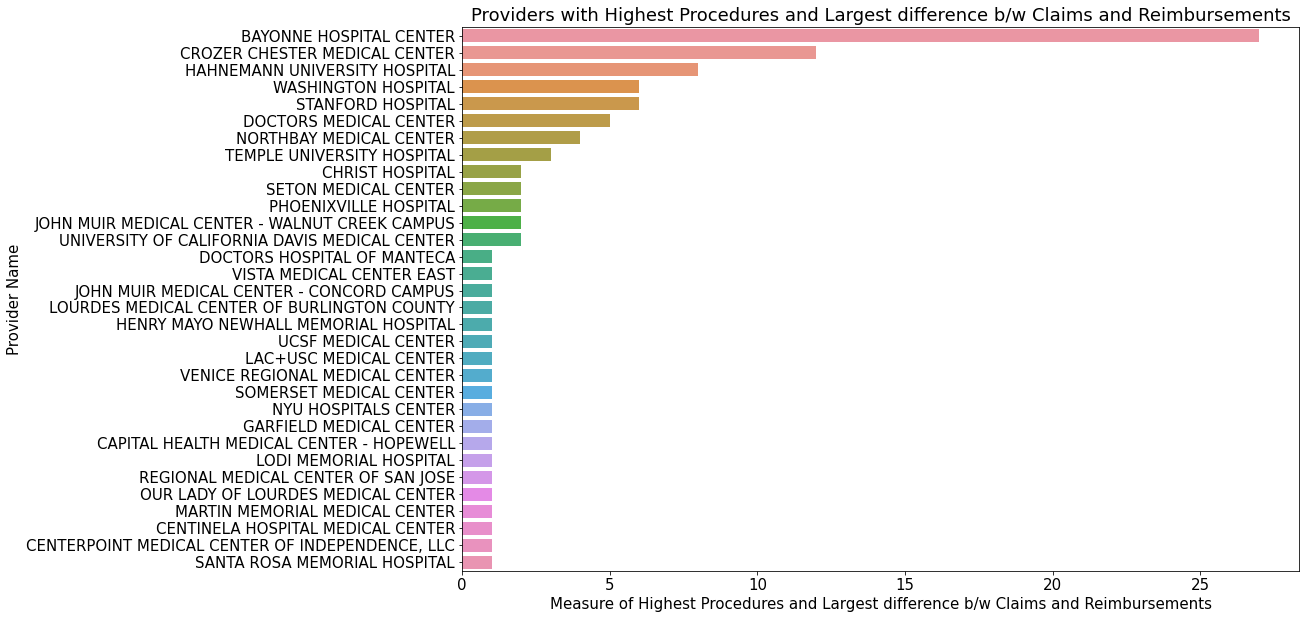

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Inpatient_summ6, x='Max_Sum', y='Provider Name', orient='h')
plt.xlabel('Measure of Highest Procedures and Largest difference b/w Claims and Reimbursements')
plt.title('Providers with Highest Procedures and Largest difference b/w Claims and Reimbursements')
plt.show()

In [ ]:
# Top 5 Providers with Highest Procedures and Largest difference b/w Claims and Reimbursements for Inpatient Data
Inpatient_summ6.head(5)

,Provider Name,Max_Sum
0,BAYONNE HOSPITAL CENTER,27
1,CROZER CHESTER MEDICAL CENTER,12
2,HAHNEMANN UNIVERSITY HOSPITAL,8
3,WASHINGTON HOSPITAL,6
4,STANFORD HOSPITAL,6


### For Outpatient Data

In [ ]:
Outpatient1['Claim_Diff'] = Outpatient1['Average  Estimated Submitted Charges'] - Outpatient1['Average Total Payments']

In [ ]:
Outpatient_Claim_Diff_Max = Outpatient1.groupby('APC')[['Claim_Diff']].max().add_suffix('_Max').reset_index()

In [ ]:
Outpatient_summ5 = Outpatient1.merge(Outpatient_Claim_Diff_Max, on='APC', how='left')

In [ ]:
temp_list = []
for x,y in zip(Outpatient_summ5['Claim_Diff'], Outpatient_summ5['Claim_Diff_Max']):
  if x < y:
    temp_list.append(0)
  else :
    temp_list.append(1)
Outpatient_summ5['Max'] = temp_list

In [ ]:
Outpatient_summ6 = Outpatient_summ5.groupby('Provider Name')[['Max']].sum().add_suffix('_Sum').sort_values(by='Max_Sum', ascending=False).reset_index()
Outpatient_summ6 = Outpatient_summ6[Outpatient_summ6.Max_Sum > 0]

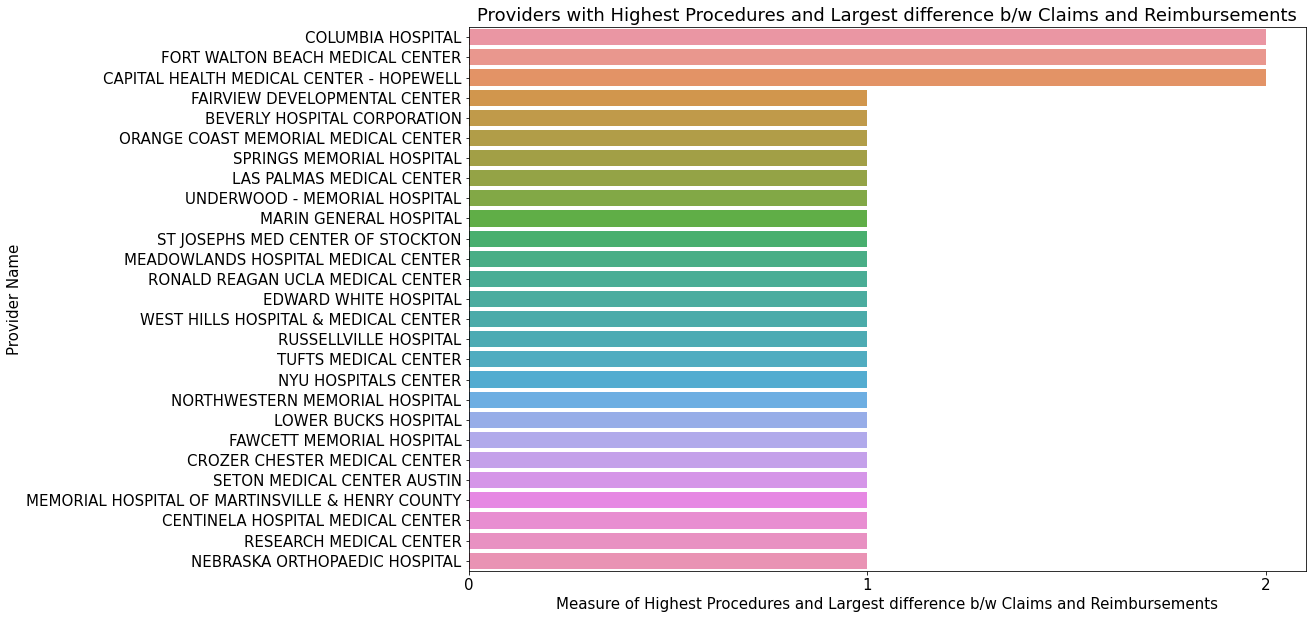

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=Outpatient_summ6, x='Max_Sum', y='Provider Name', orient='h')
plt.xticks([0,1,2])
plt.xlabel('Measure of Highest Procedures and Largest difference b/w Claims and Reimbursements')
plt.title('Providers with Highest Procedures and Largest difference b/w Claims and Reimbursements')
plt.show()

In [ ]:
# Top 3 Providers with Highest Procedures and Largest difference b/w Claims and Reimbursements for Outpatient Data
Outpatient_summ6.head(3)

,Provider Name,Max_Sum
0,COLUMBIA HOSPITAL,2
1,FORT WALTON BEACH MEDICAL CENTER,2
2,CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,2
